# FINAL YEAR PROJECT

Importing libraries and loading dataset

In [189]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [190]:
df = pd.read_csv("./dataset/diabetic_data.csv")

### Exploratory Data Analysis

In [191]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [192]:
#checking shape of the dataset
df.shape

(101766, 50)

In [193]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


## Preprocessing

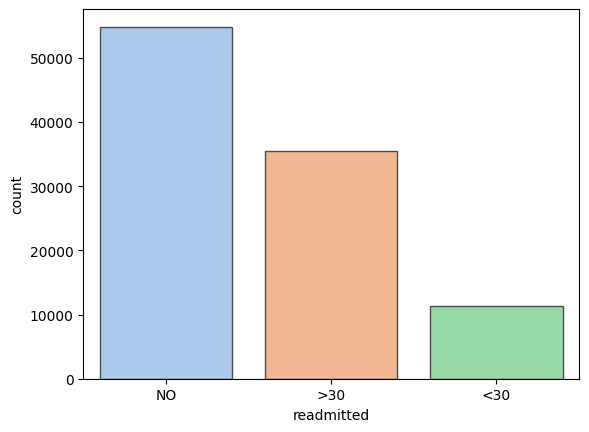

In [195]:
sns.countplot(x=df.readmitted, data=df, palette="pastel", edgecolor=".3")
plt.show()

The target variable under consideration is the hospital readmission status of the patient within a time frame of 30 days. The variable has three categories: "<30", ">30", and "No Readmission". In order to simplify the problem, we will convert the multi-class classification task into a binary classification task.

In [196]:
df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'] = df['readmitted'].replace('<30', 0)
df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'].value_counts()

0    66221
1    35545
Name: readmitted, dtype: int64

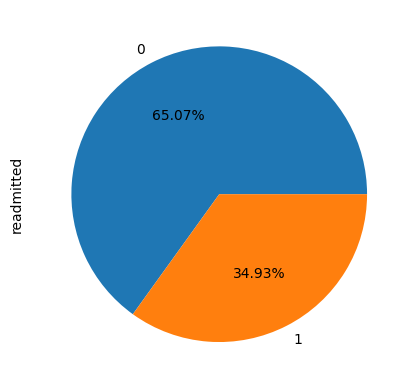

In [197]:
labels=['0','1']
df.readmitted.value_counts().plot.pie(autopct="%1.2f%%",labels=labels, )
plt.show()

In [198]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0


In [199]:
#Replacing missing value
df.replace('?', np.nan , inplace=True)
df["race"].fillna(df["race"].mode()[0], inplace = True)

#Dropping values with Unkown gender
df.gender.replace('Unknown/Invalid', np.nan , inplace=True)
df.dropna(subset=['gender'], how='all', inplace = True)
df["race"].isnull().sum()

0

In [200]:

# Get count of unique values for all columns
unique_counts = df.apply(pd.Series.nunique)

# Sort the unique value counts in descending order
unique_counts_sorted = unique_counts.sort_values(ascending=True)

# Print the sorted unique value counts
print(unique_counts_sorted)

examide                          1
citoglipton                      1
readmitted                       2
acetohexamide                    2
tolbutamide                      2
glipizide-metformin              2
troglitazone                     2
diabetesMed                      2
metformin-rosiglitazone          2
gender                           2
change                           2
glimepiride-pioglitazone         2
metformin-pioglitazone           2
tolazamide                       3
chlorpropamide                   4
glimepiride                      4
glipizide                        4
glyburide                        4
glyburide-metformin              4
acarbose                         4
miglitol                         4
nateglinide                      4
insulin                          4
pioglitazone                     4
rosiglitazone                    4
metformin                        4
A1Cresult                        4
max_glu_serum                    4
repaglinide         

Therefore we will be droppping some of these these attributes based on: 
1) the amount of misssing values
2) number if unique values
3) Logically see if some attributes affect readmission(Ex patient id)

In [201]:
drop_list = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
df.drop(drop_list,axis=1, inplace=True)

### Determining of Numerical and Categorical Columns

In [202]:

# Find numerical columns
num_cols = df.select_dtypes(include=['int64']).columns.tolist()                                                                                                                                                                                                                                                                                                                                      

#Removing them because even though they have numbers. The numbers represent a category.Refer ID mapping.
num_cols.remove('admission_type_id')
num_cols.remove('discharge_disposition_id')
num_cols.remove('admission_source_id')
num_cols.remove('readmitted')

len(num_cols), num_cols


(8,
 ['time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'num_medications',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses'])

In [203]:
# Find categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.append('admission_type_id')
cat_cols.append('discharge_disposition_id')
cat_cols.append('admission_source_id')
cat_cols.append('readmitted')
len(cat_cols), cat_cols

(35,
 ['race',
  'gender',
  'age',
  'diag_1',
  'diag_2',
  'diag_3',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'repaglinide',
  'nateglinide',
  'chlorpropamide',
  'glimepiride',
  'acetohexamide',
  'glipizide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'tolazamide',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'readmitted'])

## VISUALISATION

### Outliers

Numerical Columns

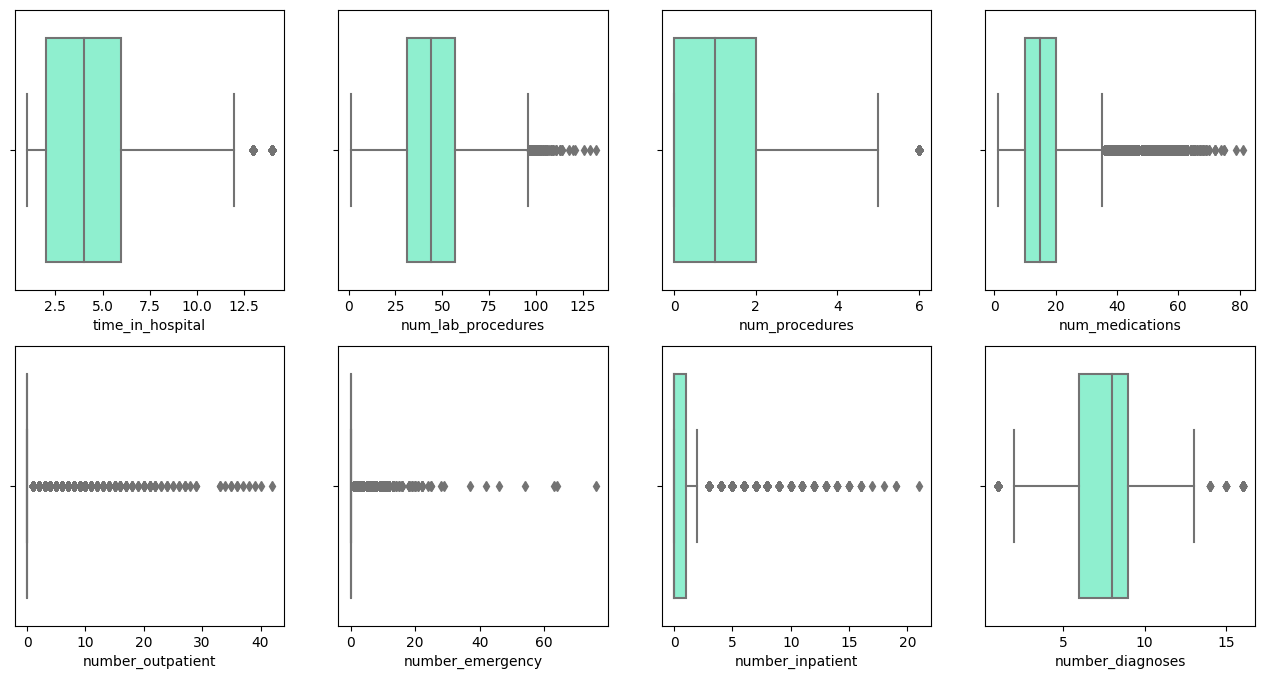

In [204]:
count = 0
fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
for i in range(2):
    for j in range(4):
        sns.boxplot(x = df[num_cols[count]], palette=["#7FFFD4"],ax=ax[i][j])  # palette = rocket, Wistia
        count = count+1
#Fun fact:IQR value of 1.5x determines what are outliers

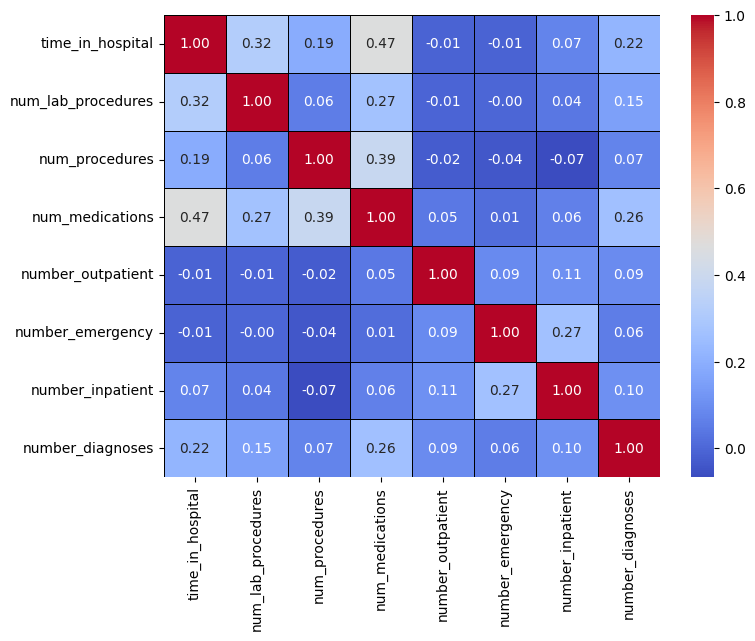

In [205]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

### Value Distribution

In [206]:
count=0
for i in df:
    count+=1
    if(count<25):
        print(i)

race
gender
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride



-------------------------------------------------------------------------------------------------------
gender
Female    54708
Male      47055
Name: gender, dtype: int64


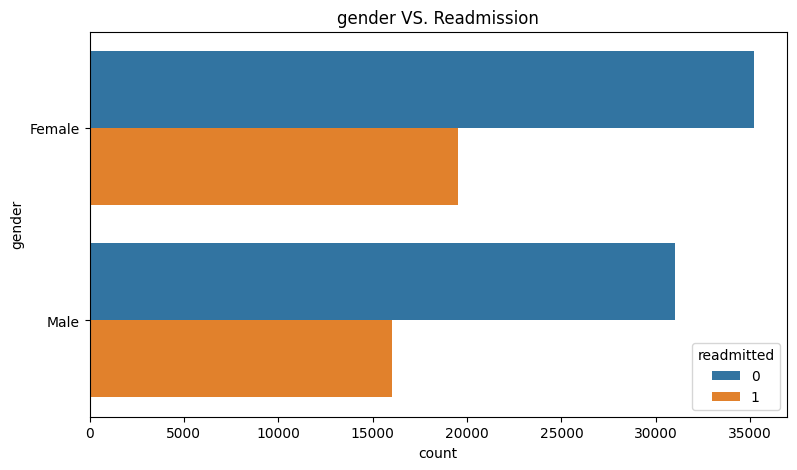


-------------------------------------------------------------------------------------------------------
number_outpatient
0     85024
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: number_outpatient, dtype: int64


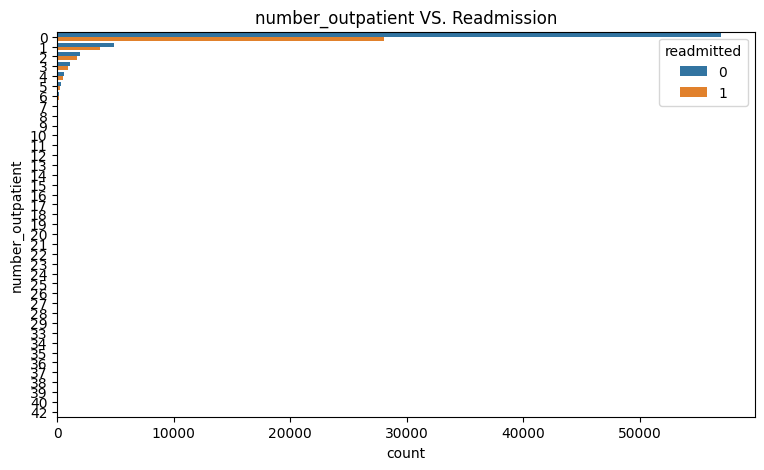


-------------------------------------------------------------------------------------------------------
admission_source_id
7     57492
1     29564
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64


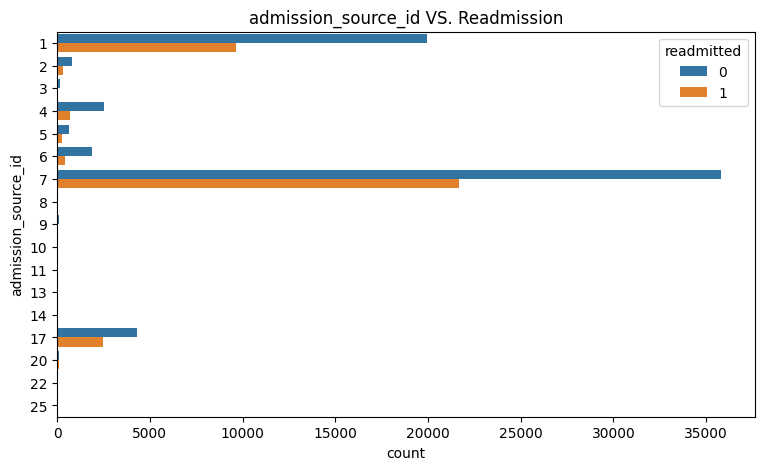


-------------------------------------------------------------------------------------------------------
discharge_disposition_id
1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


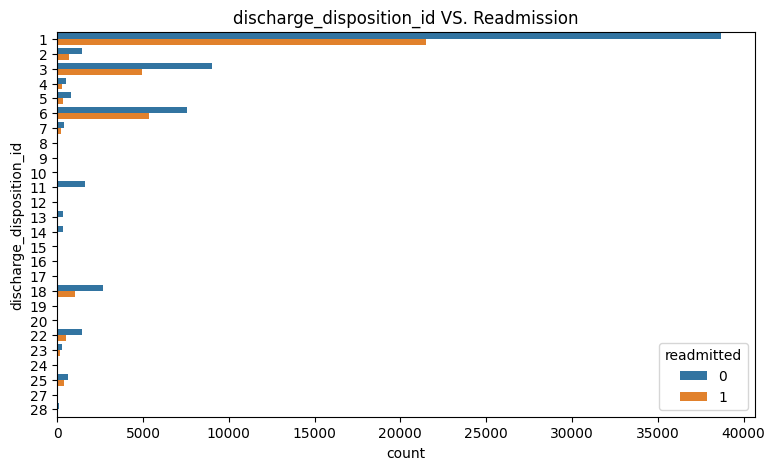


-------------------------------------------------------------------------------------------------------
num_lab_procedures
1      3208
43     2804
44     2496
45     2376
38     2212
       ... 
120       1
132       1
121       1
126       1
118       1
Name: num_lab_procedures, Length: 118, dtype: int64


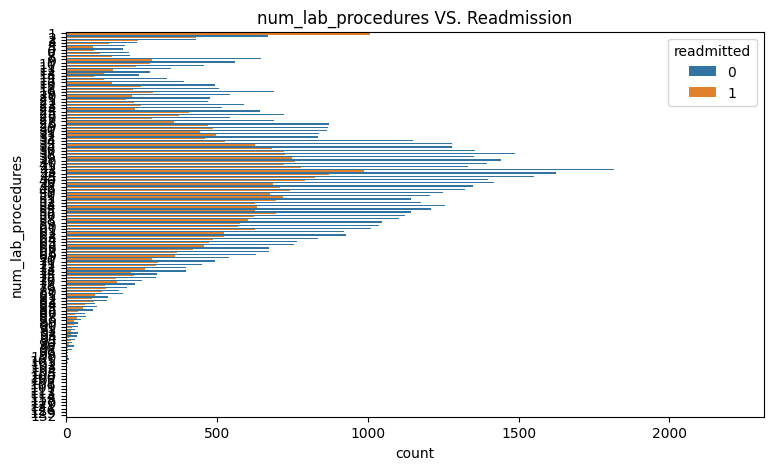


-------------------------------------------------------------------------------------------------------
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


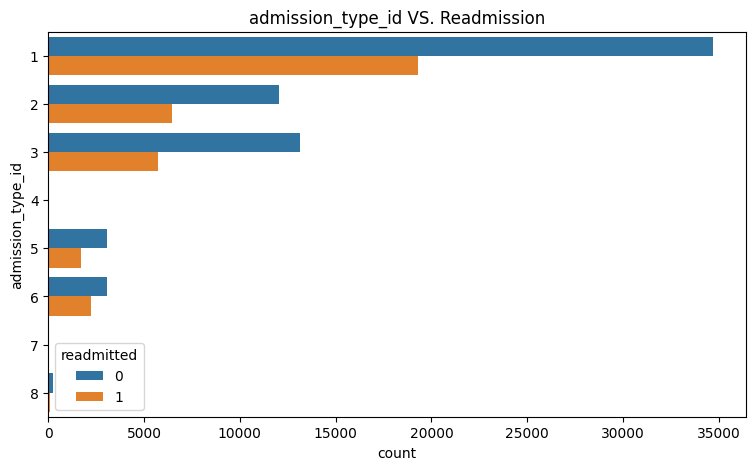


-------------------------------------------------------------------------------------------------------
num_procedures
0    46652
1    20741
2    12716
3     9443
6     4954
4     4180
5     3077
Name: num_procedures, dtype: int64


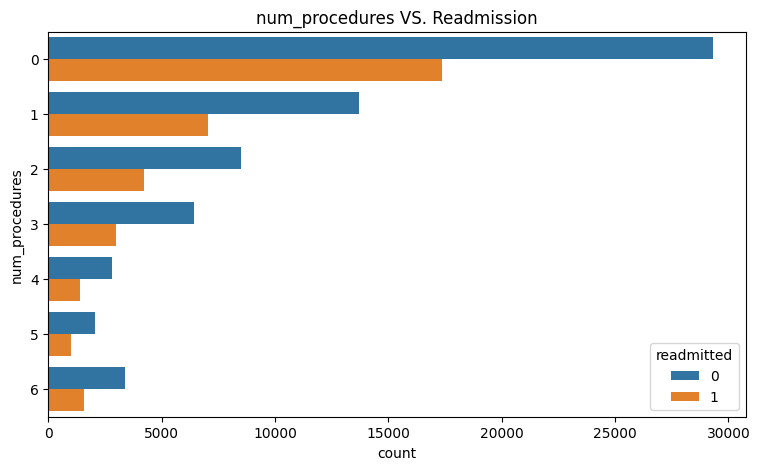


-------------------------------------------------------------------------------------------------------
number_inpatient
0     67627
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64


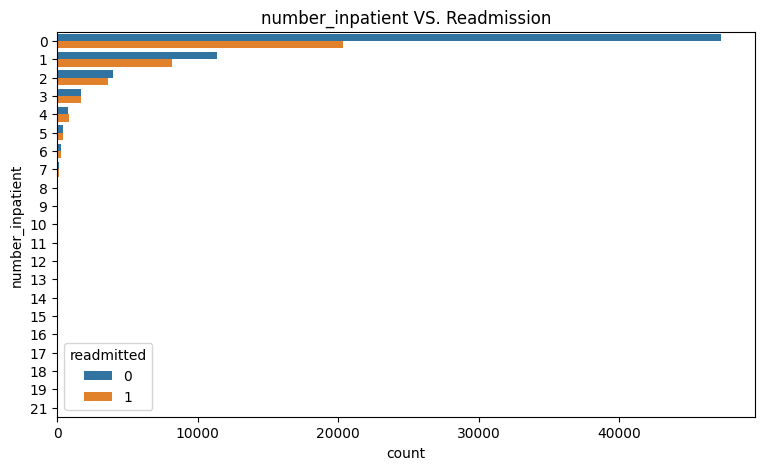


-------------------------------------------------------------------------------------------------------
race
Caucasian          78370
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64


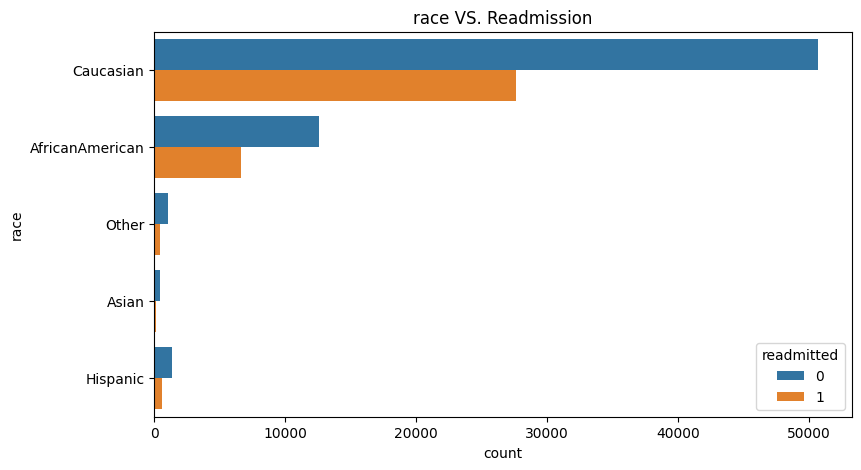


-------------------------------------------------------------------------------------------------------
time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


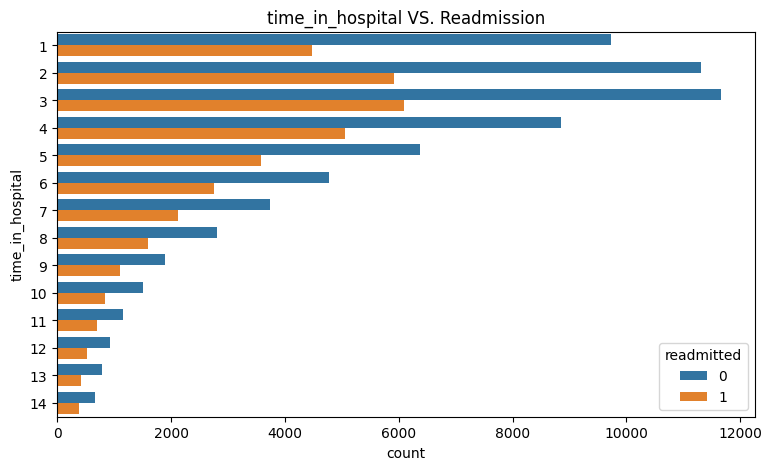


-------------------------------------------------------------------------------------------------------
number_emergency
0     90380
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64


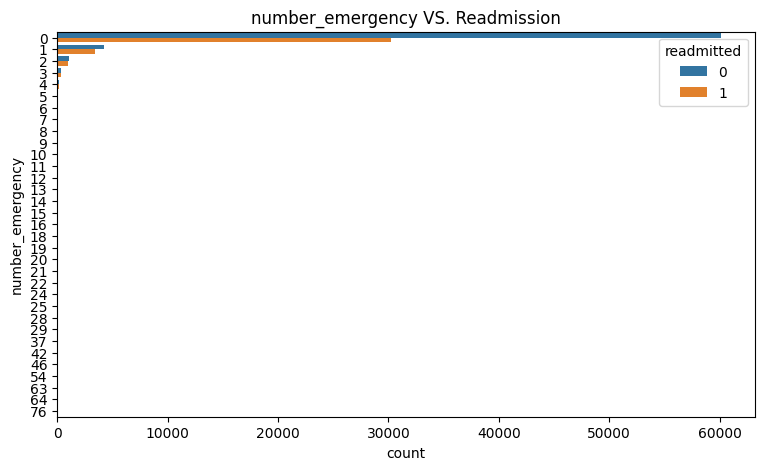


-------------------------------------------------------------------------------------------------------
age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


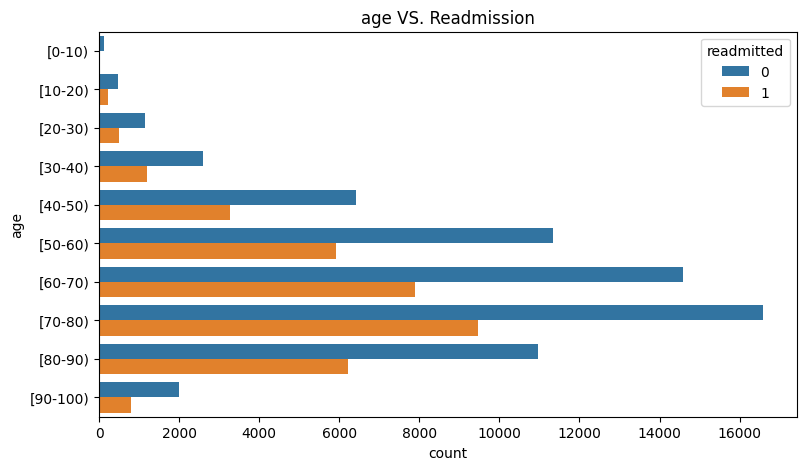


-------------------------------------------------------------------------------------------------------
num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64


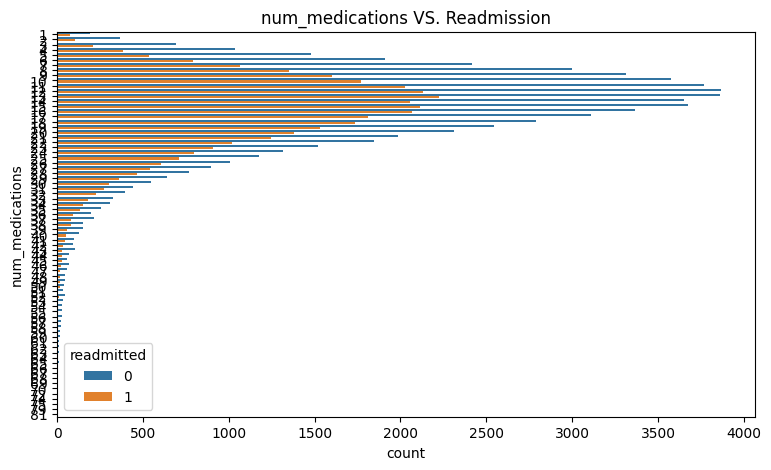

In [207]:
Visualising_list={'race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id',
'time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient',
'number_emergency','number_inpatient'}
for i in Visualising_list:
    a=df[i]
    print(f"\n-------------------------------------------------------------------------------------------------------\n{i}")
    print(a.value_counts())
    fig = plt.figure(figsize=(9,5))
    sns.countplot(y= df[i], hue = df.readmitted).set_title(f'{i} VS. Readmission')
    plt.show()

In [208]:
#Checking how much insulin affects readmission rate
df.groupby(by = "insulin").readmitted.mean()

insulin
Down      0.388934
No        0.336619
Steady    0.339784
Up        0.385472
Name: readmitted, dtype: float64

No        47380
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


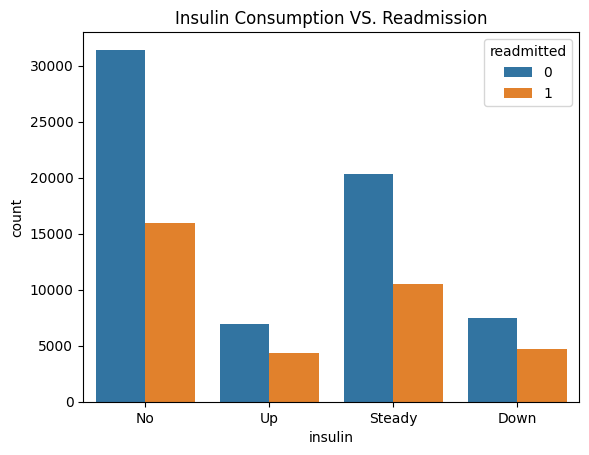

In [209]:
print(df.insulin.value_counts())
sns.countplot(x="insulin", hue="readmitted", data=df).set_title('Insulin Consumption VS. Readmission')
plt.show()

## Feature engineering

In [210]:
#df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [211]:
# re-encoding admission type, discharge type and admission source into fewer categories 
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

"""
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(21,14)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,14)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(19,11)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(20,11)

df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)"""

"\ndf['admission_type_id'] = df['admission_type_id'].replace(6,5)\ndf['admission_type_id'] = df['admission_type_id'].replace(8,5)\n\ndf['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)\ndf['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)\ndf['discharge_disposition_id'] = df['discharge_disposition_id'].replace(21,14)\ndf['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,14)\ndf['discharge_disposition_id'] = df['discharge_disposition_id'].replace(19,11)\ndf['discharge_disposition_id'] = df['discharge_disposition_id'].replace(20,11)\n\ndf['admission_source_id'] = df['admission_source_id'].replace(15,9)\ndf['admission_source_id'] = df['admission_source_id'].replace(17,9)\ndf['admission_source_id'] = df['admission_source_id'].replace(20,9)\ndf['admission_source_id'] = df['admission_source_id'].replace(21,9)"

### Removing Outliers

In [212]:
type(num_cols)

list

In [213]:
"""from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df[num_cols]))
print(z)

# 3 here is the standard deviation times. It can be changed between 1.5 and 3
print(np.where(z > 3))"""

'from scipy import stats\nimport numpy as np\n \nz = np.abs(stats.zscore(df[num_cols]))\nprint(z)\n\n# 3 here is the standard deviation times. It can be changed between 1.5 and 3\nprint(np.where(z > 3))'

In [214]:
df.shape

(99340, 43)

In [215]:
"""for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape
#IQR (76461, 43)"""

'for col in num_cols:\n        Q1 = df[col].quantile(0.25)\n        Q3 = df[col].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - 3 * IQR\n        upper_bound = Q3 + 3 * IQR\n        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]\n\ndf.shape\n#IQR (76461, 43)'

In [216]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.03)
clf.fit(df[num_cols])
outliers = clf.predict(df[num_cols])
df = df[outliers != -1]
df.shape

c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(96359, 43)

In [217]:
#Replacing missing value
df.replace('?', np.nan , inplace=True)
df["race"].isnull().sum()

0

In [218]:
print(df['diag_1'].isnull().sum())
print(df['diag_2'].isnull().sum())
print(df['diag_3'].isnull().sum())

20
348
1360


In [219]:
df['diag_1'].fillna('NaN', inplace=True)
df['diag_2'].fillna('NaN', inplace=True)
df['diag_3'].fillna('NaN', inplace=True)
print(df['diag_1'].nunique())
print(df['diag_2'].nunique())
print(df['diag_3'].nunique())

713
747
786


In [220]:
df['diag_1'].value_counts()

428    6507
414    6238
786    3952
486    3307
410    3279
       ... 
366       1
V43       1
838       1
955       1
V51       1
Name: diag_1, Length: 713, dtype: int64

In [221]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','0')
    df[col] = df[col].str.replace('V','0')
    df[col] = df[col].str.replace('NaN','-1')
    #because it has 250.0X as value which makes it hard to encode
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

In [222]:
for i in df['diag_1']:
    if(i=="?" or i=="NaN" or i=="E" or i == "V57" or i=="250.03"):
        print(i)

In [223]:
type(df['diag_1'][1])

str

In [224]:
df[diag_cols] = df[diag_cols].astype(float)

In [225]:
type(df['diag_1'][1])

numpy.float64

In [226]:
df['A1Cresult'] = df['A1Cresult'].map({'Norm': 0, '>7': 1, '>8': 1, 'None': -99})

In [227]:
df['max_glu_serum'] = df['max_glu_serum'].map({'Norm': 0, '>200': 1, '>300': 1, 'None': -99})

*** ICD CODES FROM WIKIPEDIA ***

- List of ICD-9 codes 001–139: infectious and parasitic diseases
- List of ICD-9 codes 140–239: neoplasms
- List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
- List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
- List of ICD-9 codes 290–319: mental disorders
- List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
- List of ICD-9 codes 390–459: diseases of the circulatory system
- List of ICD-9 codes 460–519: diseases of the respiratory system
- List of ICD-9 codes 520–579: diseases of the digestive system
- List of ICD-9 codes 580–629: diseases of the genitourinary system
- List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
- List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
- List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
- List of ICD-9 codes 740–759: congenital anomalies
- List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
- List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
- List of ICD-9 codes 800–999: injury and poisoning
- List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

In [228]:
def assign_category(value):
    if value >= 390 and value <= 459:
        group = 'Diseases of the Circulatory System'
    elif value >= 460 and value <= 519:
        group = 'Diseases of the Respiratory System'
    elif value >= 520 and value <= 579:
        group = 'Diseases of the Digestive System'
    elif value >= 580 and value <= 629:
        group = 'Diseases of the Genitourinary System'
    elif value >= 630 and value <= 679:
        group = 'Complications of Pregnancy, Childbirth, and the Puerperium'
    elif value >= 680 and value <= 709:
        group = 'Diseases of the Skin and Subcutaneous Tissue'
    elif value >= 710 and value <= 739:
        group = 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif value >= 740 and value <= 759:
        group = 'Congenital Anomalies'
    elif value >= 760 and value <= 779:
        group = 'Certain Conditions Originating in the Perinatal Period'
    elif value >= 780 and value <= 799:
        group = 'Symptoms, Signs, and Ill-Defined Conditions'
    elif value >= 800 and value <= 999:
        group = 'Injury and Poisoning'
    else:
        group = 'Other'
    return group

In [229]:
for col in diag_cols:
     df[col] = df[col].apply(assign_category)

Diseases of the Circulatory System                              28680
Other                                                           22245
Diseases of the Respiratory System                               9610
Diseases of the Digestive System                                 8821
Symptoms, Signs, and Ill-Defined Conditions                      7464
Injury and Poisoning                                             6671
Diseases of the Genitourinary System                             4844
Diseases of the Musculoskeletal System and Connective Tissue     4843
Diseases of the Skin and Subcutaneous Tissue                     2464
Complications of Pregnancy, Childbirth, and the Puerperium        669
Congenital Anomalies                                               48
Name: diag_1, dtype: int64


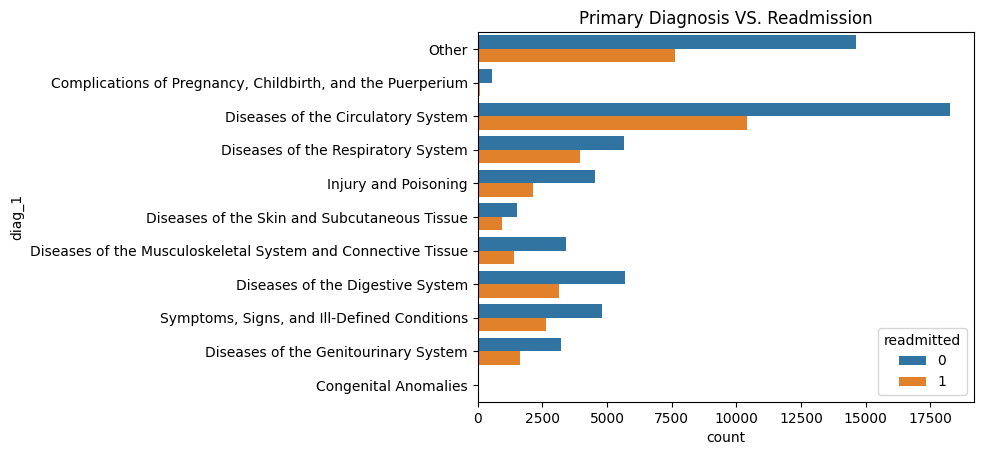

In [230]:
print(df.diag_1.value_counts())
sns.countplot(y="diag_1", hue="readmitted", data=df).set_title('Primary Diagnosis VS. Readmission')
plt.show()

Other                                                           32841
Diseases of the Circulatory System                              29815
Diseases of the Respiratory System                               9437
Diseases of the Genitourinary System                             7503
Symptoms, Signs, and Ill-Defined Conditions                      4369
Diseases of the Digestive System                                 3755
Diseases of the Skin and Subcutaneous Tissue                     3395
Injury and Poisoning                                             3032
Diseases of the Musculoskeletal System and Connective Tissue     1704
Complications of Pregnancy, Childbirth, and the Puerperium        402
Congenital Anomalies                                              106
Name: diag_2, dtype: int64


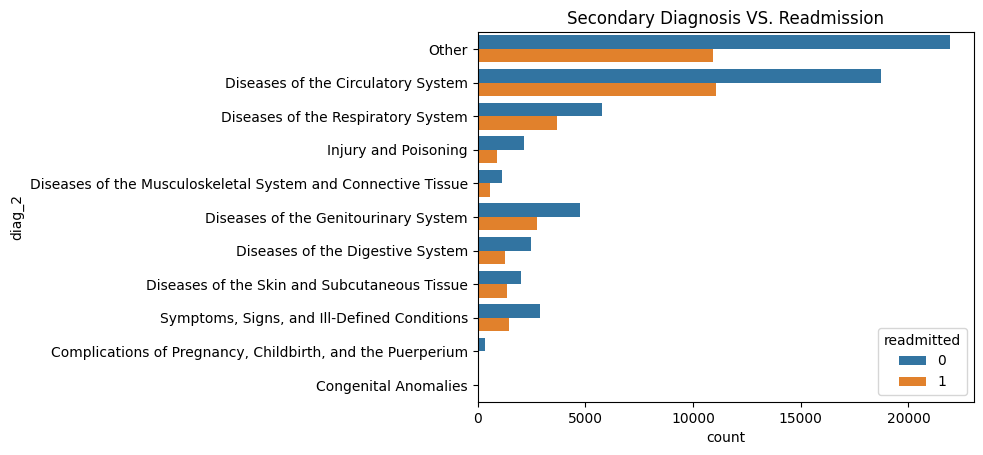

In [231]:
print(df.diag_2.value_counts())
sns.countplot(y="diag_2", hue="readmitted", data=df).set_title('Secondary Diagnosis VS. Readmission')
plt.show()

Other                                                           40573
Diseases of the Circulatory System                              28499
Diseases of the Respiratory System                               6186
Diseases of the Genitourinary System                             5843
Symptoms, Signs, and Ill-Defined Conditions                      4306
Diseases of the Digestive System                                 3373
Injury and Poisoning                                             3036
Diseases of the Skin and Subcutaneous Tissue                     2310
Diseases of the Musculoskeletal System and Connective Tissue     1841
Complications of Pregnancy, Childbirth, and the Puerperium        301
Congenital Anomalies                                               91
Name: diag_3, dtype: int64


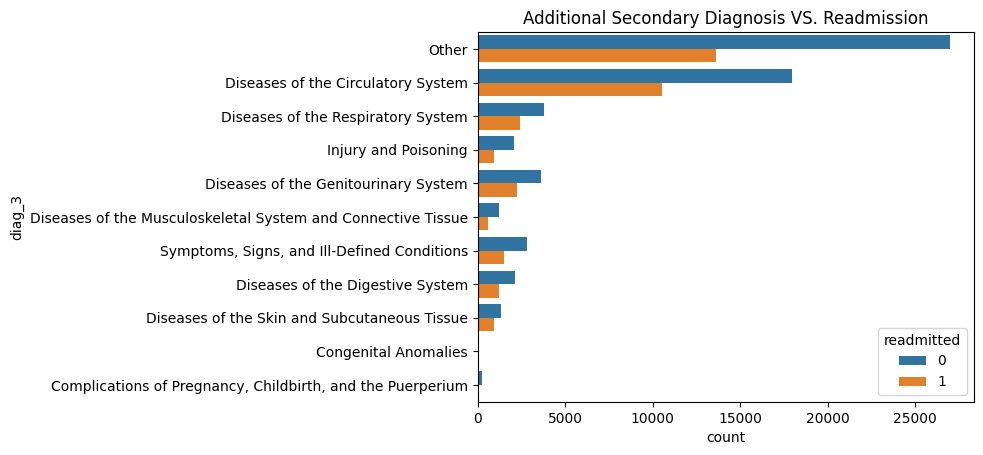

In [232]:
print(df.diag_3.value_counts())
sns.countplot(y="diag_3", hue="readmitted", data=df).set_title('Additional Secondary Diagnosis VS. Readmission')
plt.show()

In [233]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

### Encoding

In [234]:
for col in drugs:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
    df[col] = df[col].astype(int)

In [235]:
# One hot Encoding Race to convert categorical values to numerical ones
one_hot_data = pd.get_dummies(df, columns=['race'], prefix=["enc"])

# One hot Encoding Admission, Discharge, and Admission Source IDs
columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
#one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids, dtype=int, prefix=columns_ids)
one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96359 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      96359 non-null  object
 1   gender                    96359 non-null  object
 2   age                       96359 non-null  object
 3   admission_type_id         96359 non-null  int64 
 4   discharge_disposition_id  96359 non-null  int64 
 5   admission_source_id       96359 non-null  int64 
 6   time_in_hospital          96359 non-null  int64 
 7   num_lab_procedures        96359 non-null  int64 
 8   num_procedures            96359 non-null  int64 
 9   num_medications           96359 non-null  int64 
 10  number_outpatient         96359 non-null  int64 
 11  number_emergency          96359 non-null  int64 
 12  number_inpatient          96359 non-null  int64 
 13  diag_1                    96359 non-null  object
 14  diag_2               

In [237]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'] = df['age'].astype(int)
df['age'].value_counts()

8     24766
7     21408
6     16456
9     16148
5      9144
4      3559
10     2567
3      1479
2       672
1       160
Name: age, dtype: int64

In [238]:
df.to_csv('./dataset/PreprocessedData.csv')

## MODEL BUIDING

**Label Encoding**

In [239]:
df['gender'].value_counts()

Female    51791
Male      44568
Name: gender, dtype: int64

In [240]:
df['race'].value_counts()

Caucasian          74219
AfricanAmerican    18137
Hispanic            1960
Other               1426
Asian                617
Name: race, dtype: int64

In [241]:
df['change'].value_counts()

No    51998
Ch    44361
Name: change, dtype: int64

In [242]:
df['diabetesMed'].value_counts()

Yes    74258
No     22101
Name: diabetesMed, dtype: int64

In [243]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race'] = le.fit_transform(df['race'])
df['change'] = le.fit_transform(df['change'])
df['diabetesMed']=le.fit_transform(df['diabetesMed'])
df['diag_1']=le.fit_transform(df['diag_1'])
df['diag_2']=le.fit_transform(df['diag_2'])
df['diag_3']=le.fit_transform(df['diag_3'])

In [244]:
df['gender'].value_counts()

0    51791
1    44568
Name: gender, dtype: int64

In [245]:
df['race'].value_counts()

2    74219
0    18137
3     1960
4     1426
1      617
Name: race, dtype: int64

In [246]:
df['change'].value_counts()

1    51998
0    44361
Name: change, dtype: int64

In [247]:
df['diabetesMed'].value_counts()

1    74258
0    22101
Name: diabetesMed, dtype: int64

In [248]:
for i in df:
    print(df[i])


0         2
1         2
2         0
3         2
4         2
         ..
101761    0
101762    0
101763    2
101764    2
101765    2
Name: race, Length: 96359, dtype: int32
0         0
1         0
2         0
3         1
4         1
         ..
101761    1
101762    0
101763    1
101764    0
101765    1
Name: gender, Length: 96359, dtype: int32
0         1
1         2
2         3
3         4
4         5
         ..
101761    8
101762    9
101763    8
101764    9
101765    8
Name: age, Length: 96359, dtype: int32
0         6
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    2
101765    1
Name: admission_type_id, Length: 96359, dtype: int64
0         25
1          1
2          1
3          1
4          1
          ..
101761     3
101762     4
101763     1
101764     3
101765     1
Name: discharge_disposition_id, Length: 96359, dtype: int64
0         1
1         7
2         7
3         7
4         7
         ..
101761    7
101762    5

In [249]:
print(df['diag_1'])

0         9
1         9
2         0
3         9
4         9
         ..
101761    9
101762    3
101763    9
101764    8
101765    3
Name: diag_1, Length: 96359, dtype: int32


## Resampling

In [250]:
from sklearn.utils import resample



not_readmitted = df[df.readmitted==0]
readmitted = df[df.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])
downsampled.readmitted.value_counts()
df = pd.DataFrame(downsampled)

In [251]:
df.to_csv('./dataset/Encoded.csv')

## MODELS

In [252]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [254]:
#LogisticRegressionCv gets the best model from multiple cross validation of it
from sklearn.linear_model import LogisticRegression
lg_old=LogisticRegression()
lg_old.fit(X_train,y_train)

# predict on test set
y_pred = lg_old.predict(X_test)

c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression

In [255]:
#Testing code

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity
thresh=0.5

In [256]:
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42).fit(X_train, y_train)

In [257]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_test)[:,1]
#threshold value=0.5
print("Logistic Regression")
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_fscore, lr_train_specificity = print_report(y_train,y_train_preds, 0.5)
print('Validation:')
lr_val_auc, lr_val_accuracy, lr_val_recall, \
    lr_val_precision,lr_val_fscore, lr_val_specificity = print_report(y_test,y_val_preds, 0.5)

Logistic Regression
Training:
AUC:0.617
accuracy:0.584
recall:0.538
precision:0.591
fscore:0.563
specificity:0.630
 
Validation:
AUC:0.622
accuracy:0.588
recall:0.550
precision:0.603
fscore:0.575
specificity:0.627
 


Random Forest

In [258]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=3, n_jobs=-1, n_estimators=1000, max_depth=10)
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=3)

In [259]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_test)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision,rf_train_fscore, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision,rf_val_fscore, rf_val_specificity = print_report(y_test,y_val_preds, thresh)

Random Forest
Training:
AUC:0.715
accuracy:0.649
recall:0.639
precision:0.651
fscore:0.645
specificity:0.659
 
Validation:
AUC:0.647
accuracy:0.609
recall:0.608
precision:0.618
fscore:0.613
specificity:0.611
 


In [260]:
import xgboost
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [261]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.57
Precision is 0.58
Recall is 0.57


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


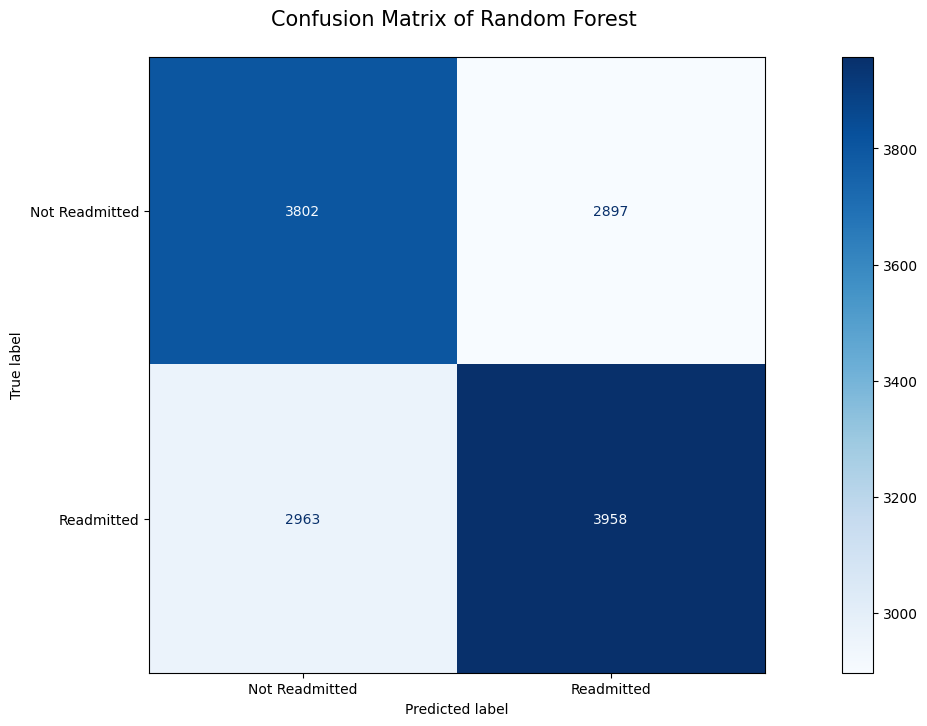

In [262]:
fig, ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(rm, X_test, y_test,
                      display_labels = ['Not Readmitted', 'Readmitted'],
                      cmap = 'Blues',
                      ax=ax
                    )
# plt.xticks(rotation=90)
plt.title('Confusion Matrix of Random Forest \n', size = 15)
plt.show()

In [263]:
def test_model(model):
    # Predict probabilities for test set
    y_prob = model.predict_proba(X_test)[:,1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print('ROC AUC Score:', roc_auc)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print('F1 Score:', f1)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)    
    # predict on test set
    y_pred = model.predict(X_test)

    # calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('Precision:', precision)
    print('Recall:', recall)

    fig, ax = plt.subplots(figsize=(20, 8))
    plot_confusion_matrix(rm, X_test, y_test,
                        display_labels = ['Not Readmitted', 'Readmitted'],
                        cmap = 'Blues',
                        ax=ax
                        )
    # plt.xticks(rotation=90)
    plt.title('Confusion Matrix of Random Forest \n', size = 15)
    plt.show()

In [264]:
test_model(lr)

NameError: name 'lr' is not defined

ROC AUC Score: 0.6103627065869399
F1 Score: 0.5664994680042559
Accuracy Score: 0.5813270698766883
Precision: 0.5988110539845758
Recall: 0.5374963945774445


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


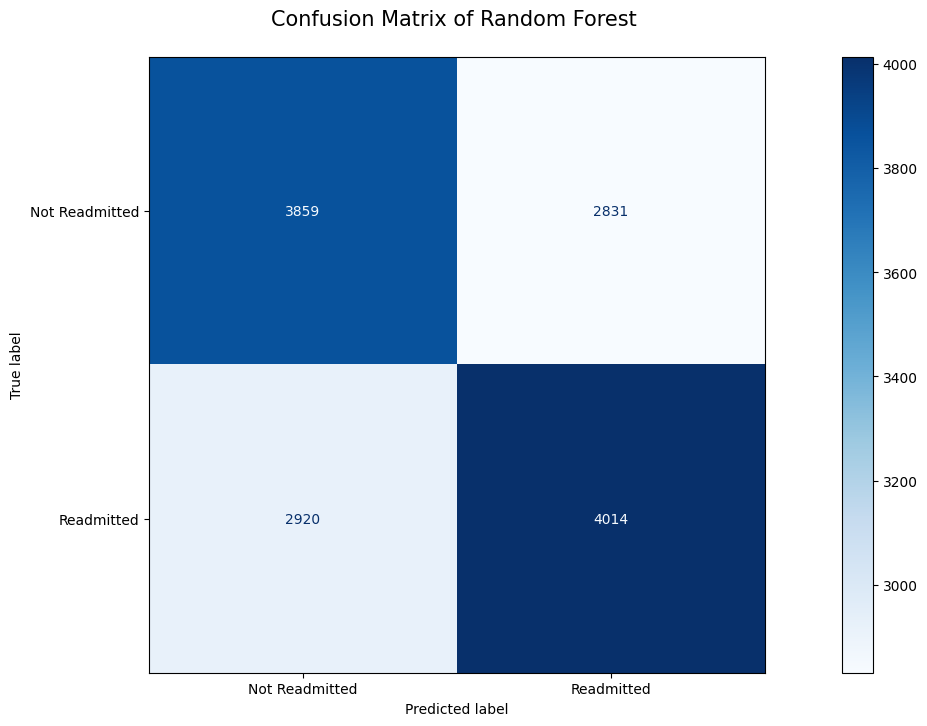

In [ ]:
test_model(log_model)

ROC AUC Score: 0.6104217837798454
F1 Score: 0.582625734813847
Accuracy Score: 0.5778772753963594
Precision: 0.5864134404674946
Recall: 0.5788866455148544


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


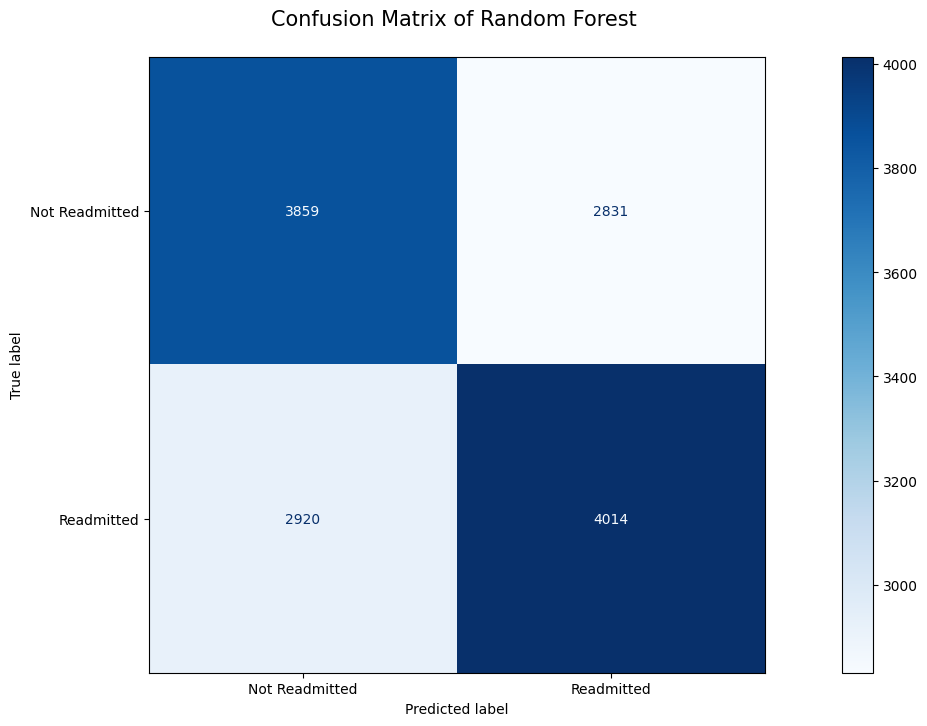

In [ ]:
test_model(rm)